# Graph: Defining a State and a Node

In [1]:
import sys
sys.path.append("..")
import sks_config
%load_ext mypy_ipython

In [2]:
from langgraph.graph import START, END, StateGraph
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.runnables import Runnable
from collections.abc import Sequence

## Define the State

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [4]:
state = State(messages = [HumanMessage("Could you tell me a grook by Piet Hein?")])

In [5]:
state["messages"][0].pretty_print()

================================ Human Message =================================

Could you tell me a grook by Piet Hein?


## Define the Nodes

In [6]:
chat = ChatOpenAI(api_key = sks_config.SKS_OPENAI_API_KEY,
                  model = "gpt-4o-mini", 
                  seed = 365, 
                  temperature = 0, 
                  max_completion_tokens = 100) 

In [7]:
response = chat.invoke(state["messages"])

In [8]:
response.pretty_print()

================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

```
Losing One Glove

Losing one glove
is certainly painful,
but nothing
compared to the pain
of losing one,
throwing away the other,
and finding
the first one again.
```

Piet Hein's grooks are known for their brevity and wit, often conveying deep insights in just a few lines.


In [9]:
def chatbot(state: State) -> State:
    
    print(f"\n-------> ENTERING chatbot:")
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return State(messages = [response])

In [10]:
chatbot(state)


-------> ENTERING chatbot:
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

```plaintext
Losing One Glove

Losing one glove
is certainly painful,
but nothing
compared to the pain
of losing one,
throwing away the other,
and finding
the first one again.
```

Piet Hein's grooks are known for their brevity and wit, often conveying deep insights in just a few lines.


{'messages': [AIMessage(content="Certainly! Here's a well-known grook by Piet Hein:\n\n```plaintext\nLosing One Glove\n\nLosing one glove\nis certainly painful,\nbut nothing\ncompared to the pain\nof losing one,\nthrowing away the other,\nand finding\nthe first one again.\n```\n\nPiet Hein's grooks are known for their brevity and wit, often conveying deep insights in just a few lines.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 18, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-Ce0bjE1sq3O0lxECTxo7ONd6AEd0t', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--ba080faa-4283-431e-8421-2c6ab3be

## Define Graph

In [11]:
graph = StateGraph(State)

graph.add_node("ChatBot", chatbot)
graph.add_edge(START, "ChatBot")
graph.add_edge("ChatBot", END)

In [12]:
graph_compiled = graph.compile()

In [13]:
isinstance(graph, Runnable), isinstance(graph_compiled, Runnable)

(False, True)

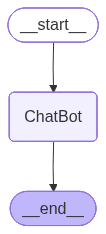

In [14]:
graph_compiled

## Test the Graph

In [15]:
graph_compiled.invoke(state)


-------> ENTERING chatbot:
================================== Ai Message ==================================

Certainly! Here's a well-known grook by Piet Hein:

```plaintext
Losing One Glove

Losing one glove
is certainly painful,
but nothing
compared to the pain
of losing one,
throwing away the other,
and finding
the first one again.
```

Piet Hein's grooks are known for their brevity and wit, often conveying deep insights in just a few lines.


{'messages': [AIMessage(content="Certainly! Here's a well-known grook by Piet Hein:\n\n```plaintext\nLosing One Glove\n\nLosing one glove\nis certainly painful,\nbut nothing\ncompared to the pain\nof losing one,\nthrowing away the other,\nand finding\nthe first one again.\n```\n\nPiet Hein's grooks are known for their brevity and wit, often conveying deep insights in just a few lines.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 18, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_cbf1785567', 'id': 'chatcmpl-Ce0bmznMHHQB56yAKZUHj6PpQJ0PH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--5610fa73-9a5b-45ef-8bcc-5de7d8b5

In [16]:
%mypy

    graph_compiled.invoke(state)
error: Argument 1 to "invoke" of "Pregel" has incompatible type "State"; expected "StateT | Command[Any] | None"  [arg-type]
Found 1 error in 1 file (checked 1 source file)


Type checking failed
